# Stepwise Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor as DTR

spy = pd.read_csv('./CSV/SPY2009_2015.csv')

In [2]:
spy['Date'] = pd.to_datetime(spy['Date'])
spy.set_index('Date', inplace=True)
spy.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-04-13,84.919998,86.540001,84.580002,85.830002,70.175331,224847500
2009-04-14,85.029999,85.760002,84.080002,84.349998,68.965286,276598800
2009-04-15,83.839996,85.419998,83.610001,85.250000,69.701111,250726100
2009-04-16,85.930000,87.150002,84.769997,86.500000,70.723137,335202900
2009-04-17,86.830002,87.650002,86.139999,87.080002,71.197350,262649000


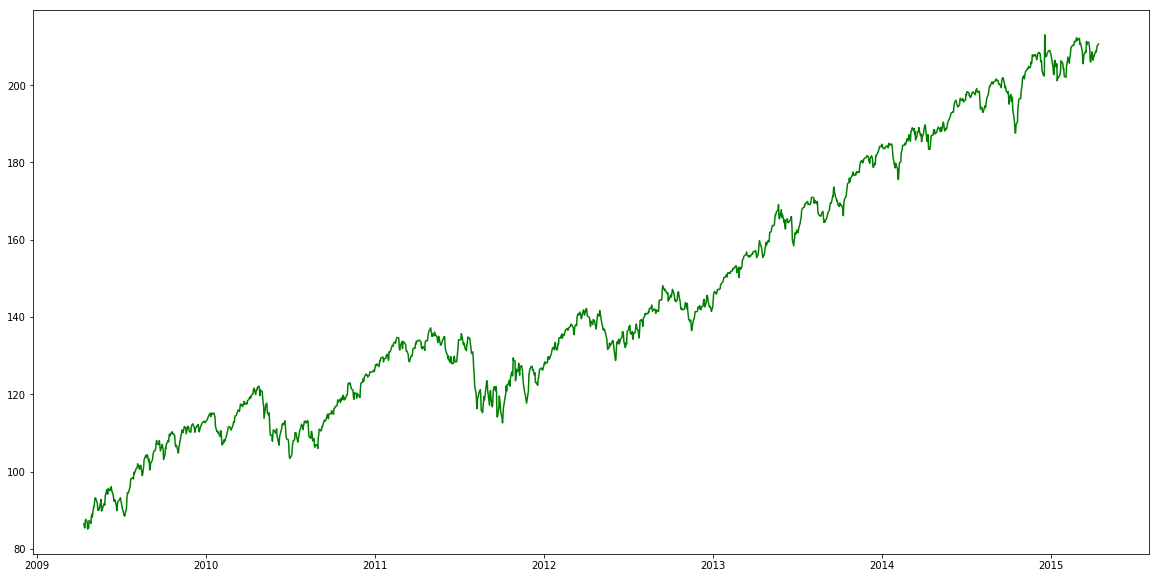

In [3]:
plt.figure(figsize=(20,10))
plt.plot(spy.High, color ='green')
plt.show()

# Test and train data set split

Now, we will split data into training and test data set. 

1. First 50% of data is used for training and remaining data for testing.
2. X_train and y_train are training dataset.
3. X_test and y_test are test dataset.

In [4]:
y = spy.Close.pct_change(1).shift(-1)

In [5]:
split_percentage = 0.5
split = int(split_percentage*len(spy))
X = spy.copy()
# Train data set
X_train = X[:split]
y_train = y[:split] 

# Test data set
X_test = X[split:]
y_test = y[split:]

In [6]:
spy['ret1'] = spy.Close.pct_change(1) #1 Day lookback
spy['ret2'] = spy.Close.pct_change(2) #2 Day lookback
spy['ret5'] = spy.Close.pct_change(5) #5 Day lookback
spy['ret20'] = spy.Close.pct_change(20) #20 Day lookback

spy = X_train.dropna()
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-04-13,84.919998,86.540001,84.580002,85.830002,70.175331,224847500
2009-04-14,85.029999,85.760002,84.080002,84.349998,68.965286,276598800
2009-04-15,83.839996,85.419998,83.610001,85.250000,69.701111,250726100
2009-04-16,85.930000,87.150002,84.769997,86.500000,70.723137,335202900
2009-04-17,86.830002,87.650002,86.139999,87.080002,71.197350,262649000


In [7]:
tree_reg = DTR(min_samples_leaf=100)
tree_reg.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=100,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

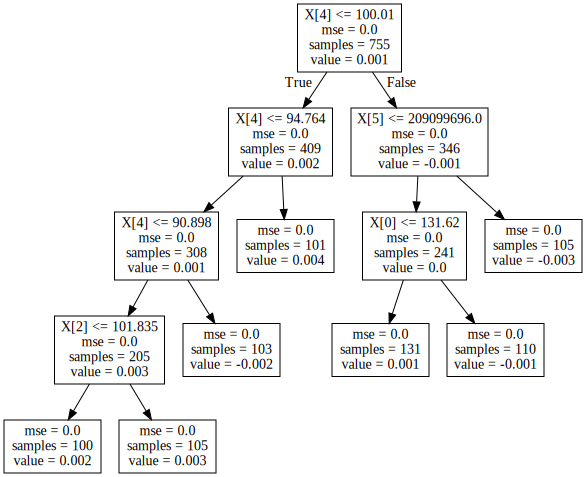

In [13]:
import graphviz
from sklearn.tree import export_graphviz

from IPython.display import display

display(graphviz.Source(export_graphviz(tree_reg)))